In [41]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [42]:
data = pd.read_csv('sample_data/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [43]:
data.shape

(768, 9)

In [44]:
data['Outcome'].unique()

array([1, 0])

In [45]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

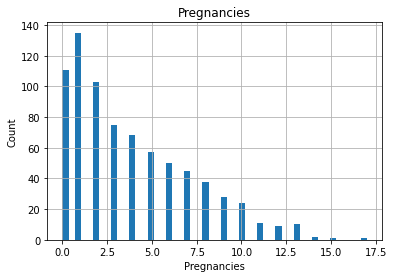

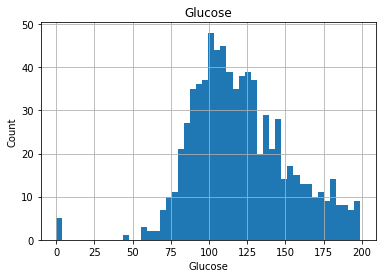

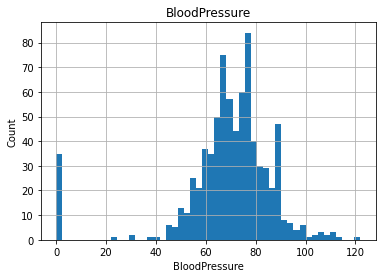

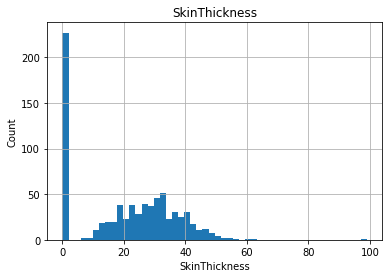

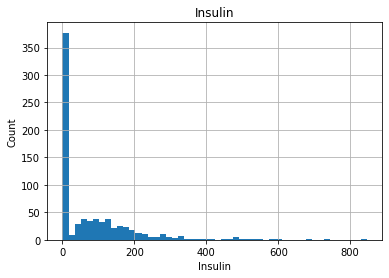

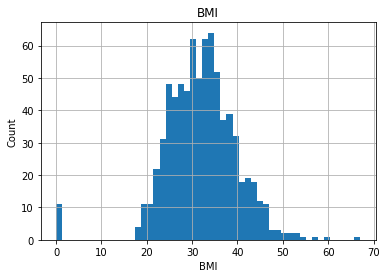

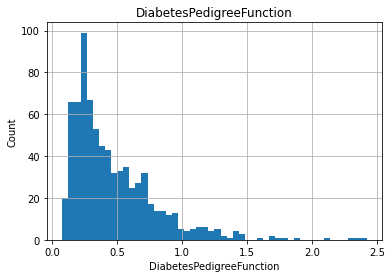

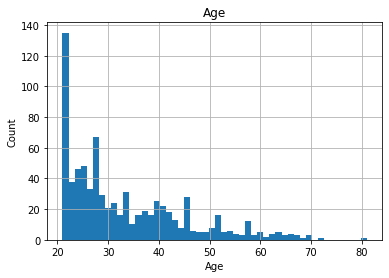

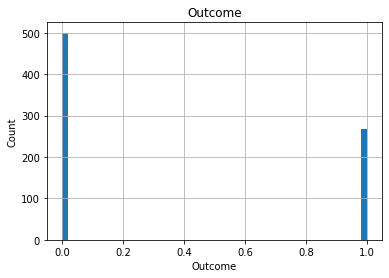

In [46]:
for feature in data:
    df=data.copy()
    figure=df[feature].hist(bins=50)
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

In [47]:
for features in data.columns[:-1]:
  data[features] = data[features]**1/3.14

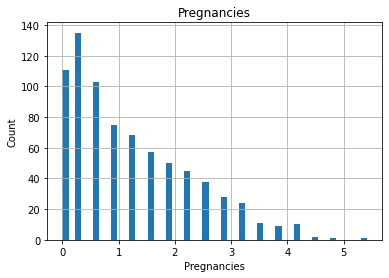

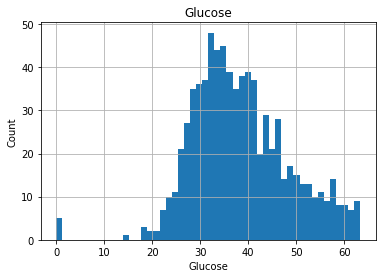

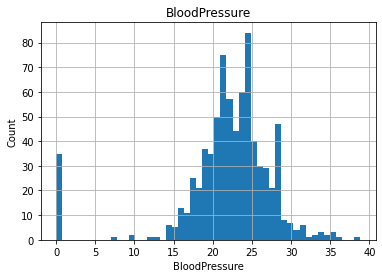

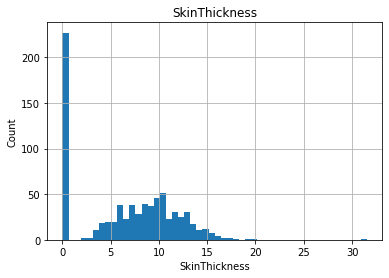

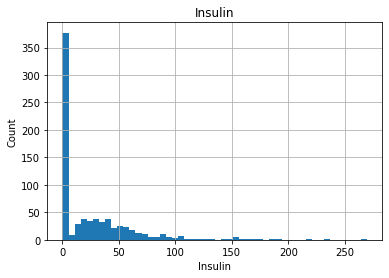

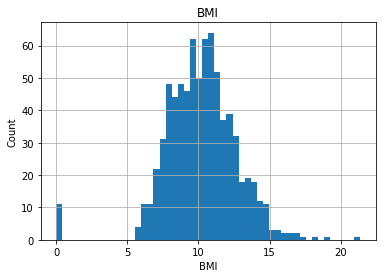

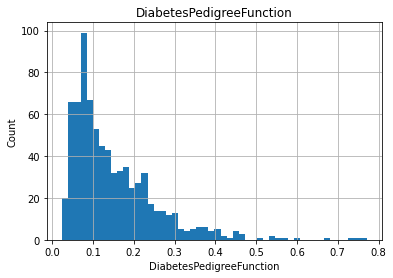

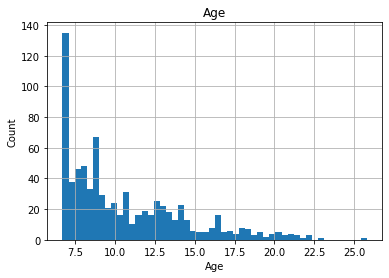

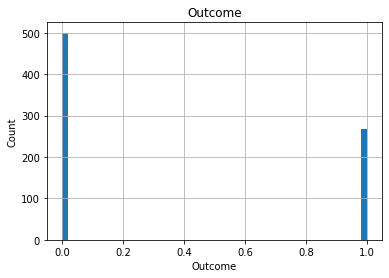

In [48]:
for feature in data.columns:
    df=data.copy()
    figure=df[feature].hist(bins=50)
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

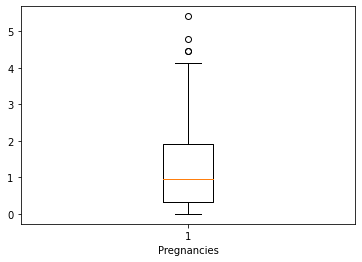

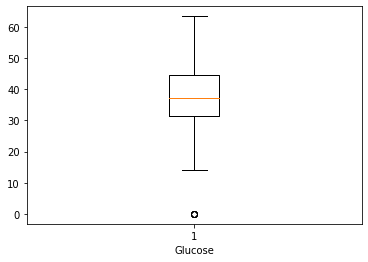

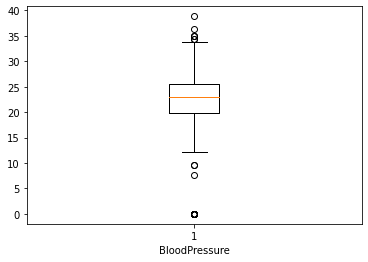

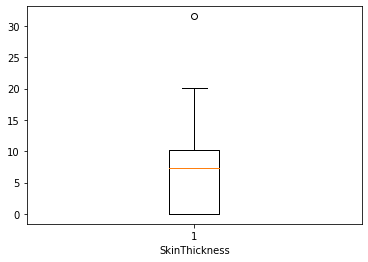

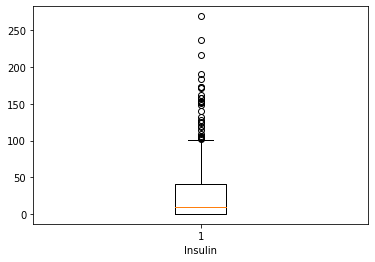

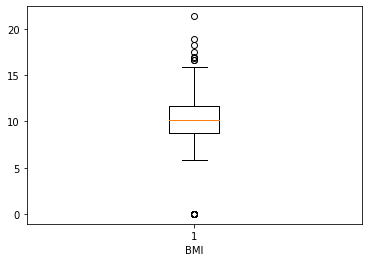

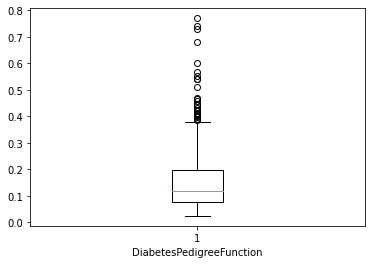

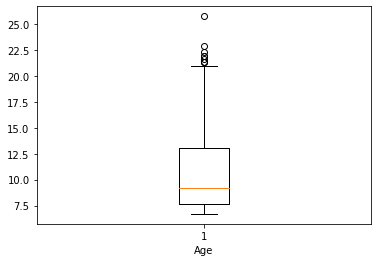

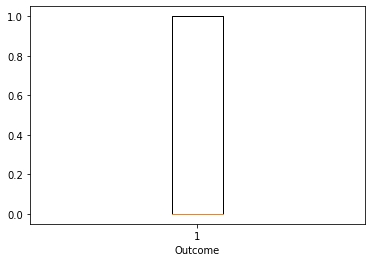

In [49]:
for feature in data.columns:
    df = data.copy()
    plt.boxplot(data=df,x=feature)
    plt.xlabel(feature)
    plt.show()

In [50]:
for feature in data.columns:
    IQR= data[feature].quantile(0.75) - data[feature].quantile(0.25)
    
    lower_bridge = data[feature].quantile(0.25)-(IQR*1.5)
    upper_bridge = data[feature].quantile(0.75)+(IQR*1.5)
    
    lower_bridge3 = data[feature].quantile(0.25)-(IQR*3)
    upper_bridge3 = data[feature].quantile(0.75)+(IQR*3)
    
    
    data.loc[data[feature]<=lower_bridge,feature] = lower_bridge
    data.loc[data[feature]>=upper_bridge,feature] = upper_bridge
    
    

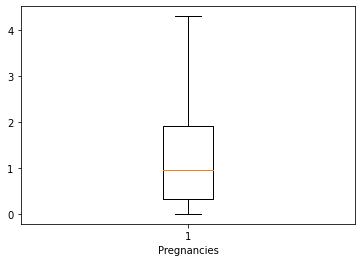

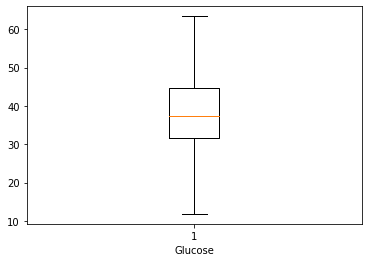

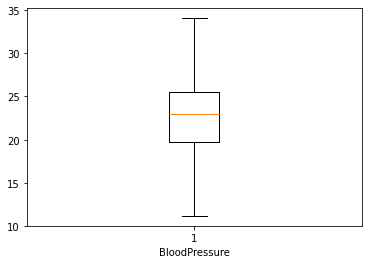

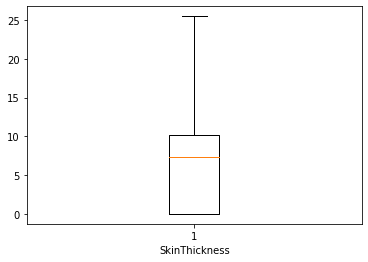

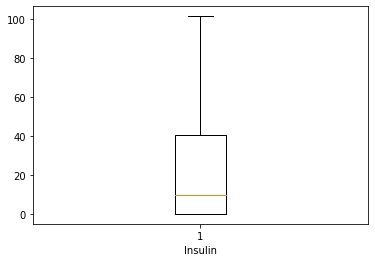

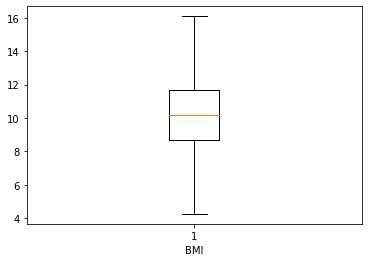

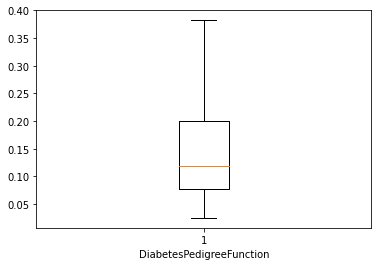

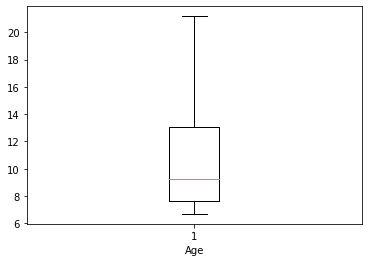

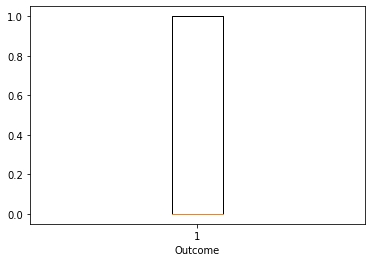

In [51]:
for feature in data.columns:
    df = data.copy()
    plt.boxplot(data=df,x=feature)
    plt.xlabel(feature)
    plt.show()

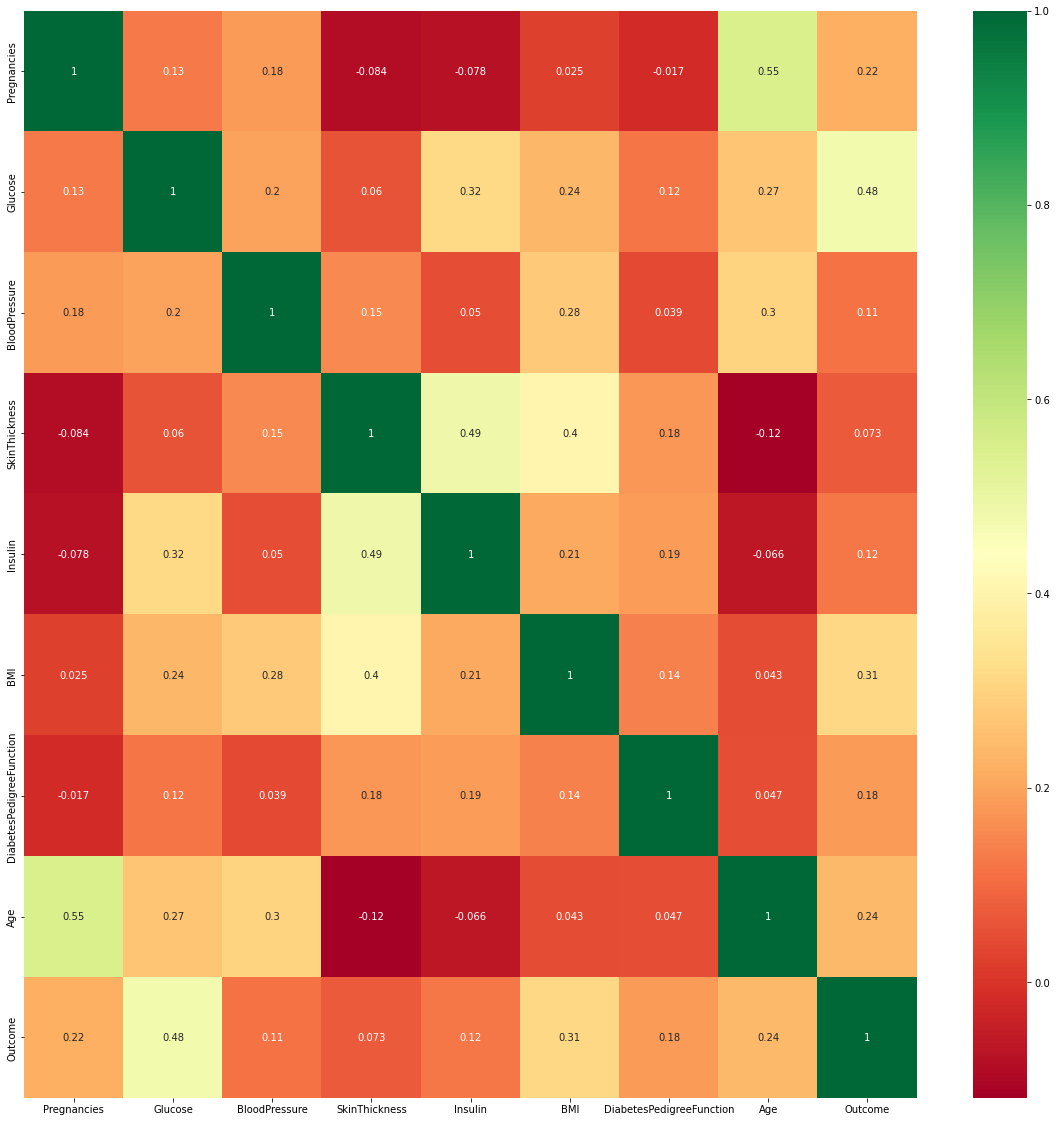

In [52]:
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [53]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [54]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor(random_state=0)
model.fit(X,y)

ExtraTreesRegressor(random_state=0)

In [55]:
model.feature_importances_

array([0.10001466, 0.29661663, 0.09361466, 0.06402531, 0.06275973,
       0.14145559, 0.10479662, 0.13671679])

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,stratify=y, random_state=0)

In [57]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler,MaxAbsScaler
scaler = StandardScaler()
# scaler = MaxAbsScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
mod = LogisticRegression(max_iter=1000)
mod.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [60]:
y_pred = mod.predict(X_test)
y_pred

array([1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1.

In [61]:
from sklearn.metrics import accuracy_score, mean_squared_error
accuracy = accuracy_score(y_pred,y_test)
loss = mean_squared_error(y_pred,y_test)

In [62]:
accuracy

0.7835497835497836

In [63]:
loss

0.21645021645021645

In [64]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0)

In [65]:
clf.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [66]:
y_pred1 = clf.predict(X_test)

In [67]:
from sklearn.metrics import accuracy_score, mean_squared_error
accuracy = accuracy_score(y_pred1,y_test)
loss = mean_squared_error(y_pred1,y_test)

In [68]:
accuracy

0.7835497835497836

In [69]:
loss

0.21645021645021645

In [70]:
from sklearn import svm

In [71]:
classifier = svm.SVC(kernel='linear',verbose=2)

In [72]:
#training the support vector Machine Classifier
classifier.fit(X_train_scaled, y_train)

[LibSVM]

SVC(kernel='linear', verbose=2)

In [73]:

y_pred2 = classifier.predict(X_test_scaled)
accuracy_score(y_pred2,y_test)

0.7792207792207793

In [74]:
import pickle

In [77]:
# saving model to disk
pickle.dump(clf,open('sample_data/diabetesModel.pkl','wb'))

In [78]:
model = pickle.load(open('sample_data/diabetesModel.pkl','rb'))